In [1]:
# Let's read the CSV file and examine the first few rows to understand the structure of the data

import pandas as pd

# Reading the CSV file
file_path = "../data/API_DT.TDS.DECT.CD_DS2_en_csv_v2_5729103.csv"
data = pd.read_csv(file_path, skiprows=3)  # Skipping initial rows if they contain metadata

# Displaying the first few rows to understand the structure
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.220331e+07,5.655585e+07,6.016716e+07,6.363779e+07,6.329185e+07,5.556366e+07,4.588731e+07,2.610630e+07,NaN,NaN
3,Africa Western and Central,AFW,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.328257e+09,8.644240e+09,1.097271e+10,9.180832e+09,1.104633e+10,1.189122e+10,8.533499e+09,1.134824e+10,NaN,NaN


In [2]:
# Defining the countries in each category
G7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
BRICS_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
BRICS_Friends_countries = ['Saudi Arabia', 'United Arab Emirates', 'Oman', 'Qatar', 'Bahrain', 'Egypt', 'Jordan', 'Algeria']

# Combining all the countries into one list
all_countries = G7_countries + BRICS_countries + BRICS_Friends_countries

# Filtering the data to include only the relevant countries
filtered_data = data[data['Country Name'].isin(all_countries)]

# Checking the filtered data
filtered_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
8,United Arab Emirates,ARE,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Bahrain,BHR,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Brazil,BRA,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.225021e+10,8.984540e+10,1.174953e+11,9.543412e+10,9.552681e+10,1.518273e+11,1.300572e+11,1.555250e+11,NaN,NaN
35,Canada,CAN,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,China,CHN,"Debt service on external debt, total (TDS, cur...",DT.TDS.DECT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.160105e+10,1.266855e+11,1.677505e+11,2.062832e+11,2.409386e+11,2.757885e+11,2.732753e+11,3.367717e+11,NaN,NaN


In [6]:
# Function to categorize the countries into the three groups
def categorize_country(row):
    if row['Country Name'] in G7_countries:
        return 'G7'
    elif row['Country Name'] in BRICS_countries:
        return 'BRICS'
    elif row['Country Name'] in BRICS_Friends_countries:
        return 'BRICS-Friends'
    else:
        return 'Other'

# Applying the categorization function
filtered_data['Category'] = filtered_data.apply(categorize_country, axis=1)

# Melting the data into a long format suitable for plotting
years_columns = [str(year) for year in range(1995, 2021)]
melted_data = filtered_data.melt(id_vars=['Country Name', 'Country Code', 'Category'], value_vars=years_columns, var_name='Year', value_name='Debt')

# Converting the 'Year' column to numeric for proper plotting
melted_data['Year'] = pd.to_numeric(melted_data['Year'])

# Checking the melted data
melted_data.tail()

/var/folders/s4/dmrwtmjx5r74xnn6rjg8d91r0000gn/T/ipykernel_21479/1367622573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Category'] = filtered_data.apply(categorize_country, axis=1)


,Country Name,Country Code,Category,Year,Debt
463,Oman,OMN,BRICS-Friends,2020,NaN
464,Qatar,QAT,BRICS-Friends,2020,NaN
465,Saudi Arabia,SAU,BRICS-Friends,2020,NaN
466,United States,USA,G7,2020,NaN
467,South Africa,ZAF,BRICS,2020,2.781355e+10


In [12]:
# Filter country Code to include Brazil, India, Russia, China and Jordan, Morocco, Egypt, Tunisia, Algeria
melted_data_brics_plus = melted_data[melted_data['Country Code'].isin(['JOR', 'BRA', 'CHN', 'IND', 'RUS', 'MAR', 'EGY', 'TUN', 'DZA'])]
melted_data_brics_plus.tail(10)

,Country Name,Country Code,Category,Year,Debt
434,Brazil,BRA,BRICS,2019,1.518273e+11
436,China,CHN,BRICS,2019,2.757885e+11
438,Algeria,DZA,BRICS-Friends,2019,1.947065e+08
441,India,IND,BRICS,2019,5.125711e+10
443,Jordan,JOR,BRICS-Friends,2019,3.343058e+09
452,Brazil,BRA,BRICS,2020,1.300572e+11
454,China,CHN,BRICS,2020,2.732753e+11
456,Algeria,DZA,BRICS-Friends,2020,1.750295e+08
459,India,IND,BRICS,2020,7.706384e+10
461,Jordan,JOR,BRICS-Friends,2020,3.107901e+09


/Users/lnshuti/anaconda3/envs/qss/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


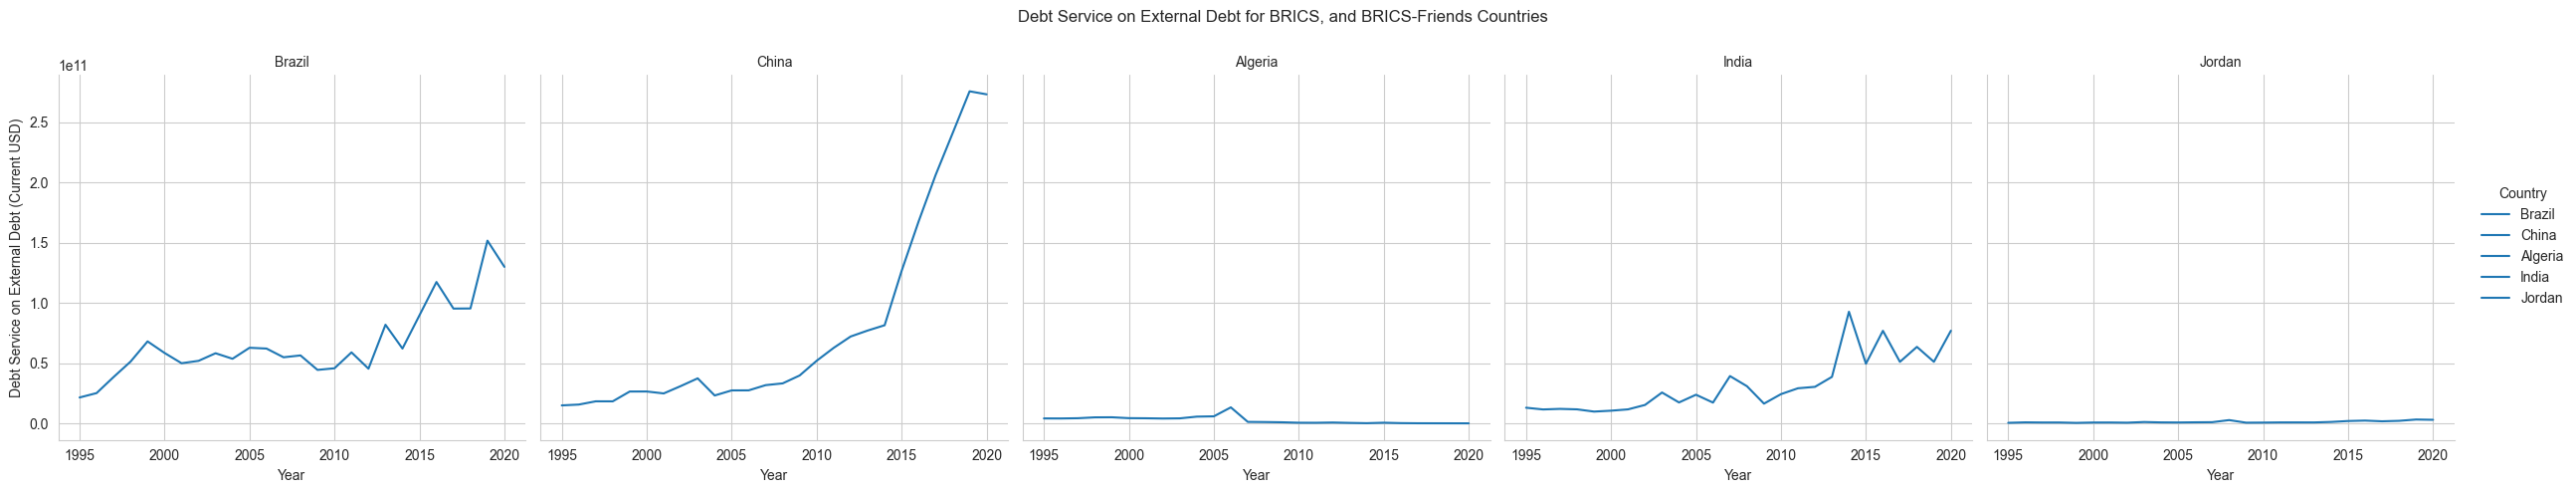

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style('whitegrid')

# Creating a FacetGrid to plot each category in a separate subplot
g = sns.FacetGrid(melted_data_brics_plus, col="Country Name", height=5, aspect=1)
g.map_dataframe(sns.lineplot, x="Year", y="Debt", hue="Country Name")
g.set_axis_labels("Year", "Debt Service on External Debt (Current USD)")
g.add_legend(title="Country")
g.set_titles(col_template="{col_name}")

# Adjusting the layout for better appearance
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Debt Service on External Debt for BRICS, and BRICS-Friends Countries")

plt.show()